# Quantum Fourier Transformation
The QFT is the Quantum equivalent of the DFT.

DFT $$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-\frac{2\pi i}{N} nk}$$
where N is the number of data points, n the current element index and k is the index in the transformed domain. Complexity: $O(N^2)
$

QFT $$|y\rangle = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi i x k / N} |k\rangle$$

Complexity: $O((\log N)^2)$


In [11]:
import cirq
import matplotlib.pyplot as plt
import numpy as np
# Define the number of qubits
n = 4  # for example, a 4-qubit QFT
qubits = [cirq.LineQubit(i) for i in range(n)]

QFT-Circuit

In [24]:
def apply_qft(circuit, qubits):
    """Function to add QFT gates to the circuit."""
    n = len(qubits)
    for i in range(n):
        # Apply Hadamard to the i-th qubit
        circuit.append(cirq.H(qubits[i]))
        # Apply controlled rotation gates
        for j in range(i+1, n):
            angle = 2 * np.pi / (2**(j-i+1))
            circuit.append(cirq.CZPowGate(exponent=angle)(qubits[j], qubits[i]))
    # Swap qubits to reverse the order for the output
    for i in range(n//2):
        circuit.append(cirq.SWAP(qubits[i], qubits[n-i-1]))
    return circuit


In [13]:
circuit = cirq.Circuit()
qft(circuit, qubits)
print("Circuit for QFT:")
print(circuit)

#fig, ax = plt.subplots(1, 1, figsize=(10, 4))
#cirq.contrib.svg.SVGCircuit(circuit)(ax)
#plt.show()

Circuit for QFT:
                     ┌──────────┐   ┌───────────────┐   ┌──────────┐
0: ───H───@───────────@──────────────@────────────────────────────────────────────────×───
          │           │              │                                                │
1: ───────@^(-3/7)────┼────────H─────┼──────@────────────@────────────────────────×───┼───
                      │              │      │            │                        │   │
2: ───────────────────@^(11/14)──────┼──────@^(-3/7)─────┼────────H────@──────────×───┼───
                                     │                   │             │              │
3: ──────────────────────────────────@^0.393─────────────@^(11/14)─────@^(-3/7)───H───×───
                     └──────────┘   └───────────────┘   └──────────┘


Applied to a sinusoidal signal
1. Discretizing the sinusoidal signal

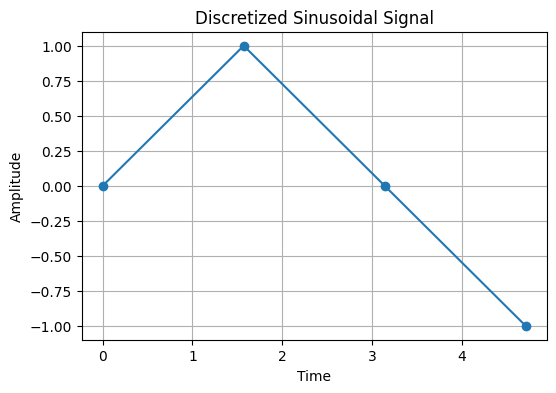

In [15]:
# Parameters for the sinusoidal signal
amplitude = 1
frequency = 1
phase = 0
samples = 4  # Must be a power of 2

# Generate the discretized signal
t = np.linspace(0, 2 * np.pi, samples, endpoint=False)
signal = amplitude * np.sin(frequency * t + phase)

# Plot the signal
plt.figure(figsize=(6, 4))
plt.plot(t, signal, 'o-')
plt.title("Discretized Sinusoidal Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

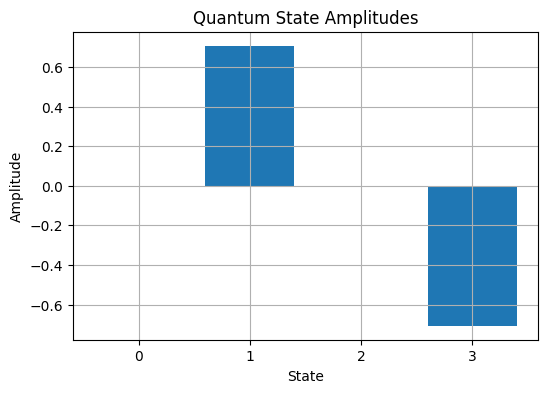

In [17]:
# Normalize the signal for quantum state representation
normalized_signal = signal / np.linalg.norm(signal)

# Plot the quantum state (amplitudes)
plt.figure(figsize=(6, 4))
plt.bar(range(len(normalized_signal)), normalized_signal)
plt.title("Quantum State Amplitudes")
plt.xlabel("State")
plt.ylabel("Amplitude")
plt.xticks(range(len(normalized_signal)))
plt.grid(True)
plt.show()

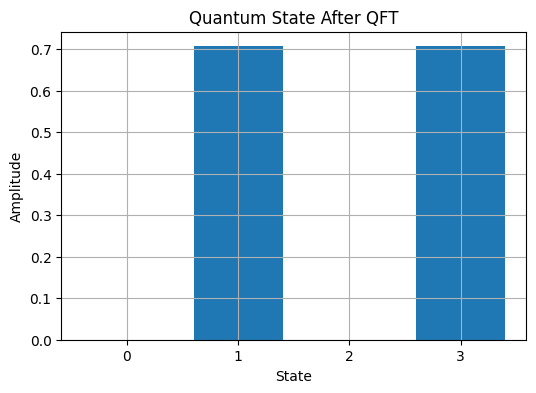

In [19]:

# Create the quantum circuit for QFT
num_qubits = int(np.log2(samples))
qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
circuit = cirq.Circuit()

# Simplified state preparation (not practical for large systems)
circuit.append(cirq.ops.MatrixGate(np.eye(2**num_qubits)).on(*qubits))

qft(circuit, qubits)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.simulate(circuit, initial_state=normalized_signal)

# Get the final state
final_state = result.final_state_vector

# Plot the final state (after QFT)
plt.figure(figsize=(6, 4))
plt.bar(range(len(final_state)), np.abs(final_state))
plt.title("Quantum State After QFT")
plt.xlabel("State")
plt.ylabel("Amplitude")
plt.xticks(range(len(final_state)))
plt.grid(True)
plt.show()


This is the equivalent of the sinusoidal signal in the frequency domain! The spectrum showes two frequency components, because of the nature of the Fourier Transformation, which for real signals will create a symmetric spectrum with a negative and a positive component

measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3))
output vector: [0.24999997+0.j 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j
 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j
 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j
 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j 0.24999997+0.j]

phase:
output vector: |⟩


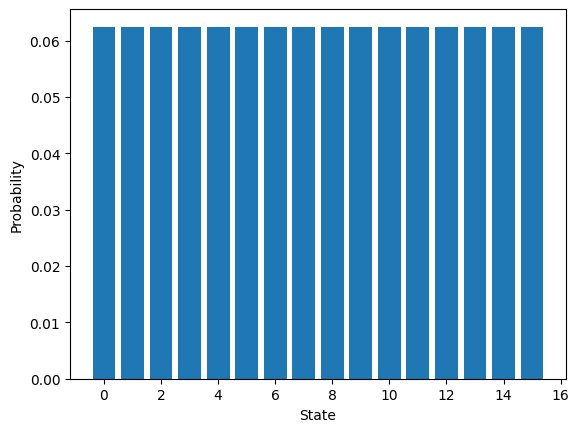

In [14]:
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print(result)

# Convert the state vector to probabilities
probabilities = np.abs(result.final_state_vector)**2

# Plot the probabilities
plt.bar(range(len(probabilities)), probabilities)
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

Sinusoidal signal with two components


C:\Users\taube\AppData\Local\Temp\ipykernel_32680\3564674904.py:37: RuntimeWarning: invalid value encountered in sqrt
  angle = 2 * np.arcsin(np.sqrt(amplitude))


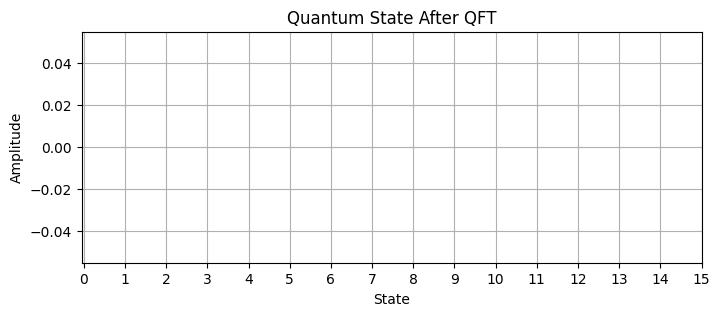

In [25]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

# Create and normalize the signal
amplitude1, frequency1 = 1, 1
amplitude2, frequency2 = 0.5, 3
samples = 16
t = np.linspace(0, 2 * np.pi, samples, endpoint=False)
signal = amplitude1 * np.sin(frequency1 * t) + amplitude2 * np.sin(frequency2 * t)
normalized_signal = signal / np.linalg.norm(signal)

# Prepare the quantum state
num_qubits = int(np.log2(samples))
qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
circuit = cirq.Circuit()

# Function to apply QFT (assumed to be defined correctly)

def apply_qft(circuit, qubits):
    for i in range(len(qubits)):
        circuit.append(cirq.H(qubits[i]))
        for j in range(i + 1, len(qubits)):
            angle = np.pi / 2 ** (j - i)
            circuit.append(cirq.CZPowGate(exponent=angle)(qubits[j], qubits[i]))
    for i in range(len(qubits) // 2):
        circuit.append(cirq.SWAP(qubits[i], qubits[-i - 1]))

# Function to prepare the state
def prepare_state(circuit, qubits, state_vector):
    for i, amplitude in enumerate(state_vector):
        # Convert index to binary representation
        bin_index = format(i, '0' + str(len(qubits)) + 'b')
        for qubit_index, bit in enumerate(bin_index):
            # Apply Ry gate based on the amplitude and bit value
            if bit == '1':
                angle = 2 * np.arcsin(np.sqrt(amplitude))
                circuit.append(cirq.ry(angle).on(qubits[qubit_index]))

prepare_state(circuit, qubits, normalized_signal)
apply_qft(circuit, qubits)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.simulate(circuit)

# Visualize the results
final_state = result.final_state_vector
plt.figure(figsize=(8, 3))
plt.bar(range(len(final_state)), np.abs(final_state))
plt.title("Quantum State After QFT")
plt.xlabel("State")
plt.ylabel("Amplitude")
plt.xticks(range(len(final_state)))
plt.grid(True)
plt.show()
